ASSIGNMENT FIRE DETECTION
=========

In [1]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
raw_csv = urllib2.urlopen(path)
feature_names = ('X', 'Y', 'month', 'day', "FFMC", "DMC", 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
target_name = 'area'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv)

In [2]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


[Mission 1] 불이 가장 많이 발생한 지역 좌표 (X, Y) 상위 5개를 제시하시오.
-----

In [3]:
sdf = df[['X', 'Y', 'area']]
sdf

,X,Y,area
0,7,5,0.00
1,7,4,0.00
2,7,4,0.00
3,8,6,0.00
4,8,6,0.00
5,8,6,0.00
6,8,6,0.00
7,8,6,0.00
8,8,6,0.00
9,7,5,0.00


**지역(X,Y)별로 화재가 난 면적의 합을 구한다.**

In [4]:
groupby_xy = sdf.groupby(['X','Y']).sum()
groupby_xy

area
X Y         
1 2   219.94
  3   157.14
  4   150.28
  5   115.47
2 2   462.65
  3     0.00
  4   143.37
  5    92.63
3 3     6.58
  4   126.35
  5     2.18
  6     0.00
4 3   172.88
  4   397.43
  5   287.01
  6    87.73
5 4    73.75
  5     0.00
  6    17.62
6 3   192.78
  4   144.47
  5  1384.05
  6     8.59
7 3    27.35
  4   474.37
  5    77.39
  6    86.45
8 3    26.31
  4    12.18
  5     2.93
  6  1265.30
  8   185.76
9 4   185.61
  5     8.16
  6    42.87
  9     4.47

**화재가 난 지역의 면적의 합을 정렬한다. (내림차순)**

In [5]:
groupby_xy = groupby_xy.sort('area',ascending=False)
groupby_xy

area
X Y         
6 5  1384.05
8 6  1265.30
7 4   474.37
2 2   462.65
4 4   397.43
  5   287.01
1 2   219.94
6 3   192.78
8 8   185.76
9 4   185.61
4 3   172.88
1 3   157.14
  4   150.28
6 4   144.47
2 4   143.37
3 4   126.35
1 5   115.47
2 5    92.63
4 6    87.73
7 6    86.45
  5    77.39
5 4    73.75
9 6    42.87
7 3    27.35
8 3    26.31
5 6    17.62
8 4    12.18
6 6     8.59
9 5     8.16
3 3     6.58
9 9     4.47
8 5     2.93
3 5     2.18
5 5     0.00
3 6     0.00
2 3     0.00

**내림차순이므로 위에서 5번째 data까지 구한다.**

In [6]:
groupby_xy.head(5)

,,area
X,Y,
6,5,1384.05
8,6,1265.30
7,4,474.37
2,2,462.65
4,4,397.43


[Mission 2] 불이 가장 많이 발생한 월 (month) 상위 2개 및 가장 많이 발생한 날 (day) 상위 2개를 제시하시오.
----------

In [7]:
sdf = df[['month', 'area']]
sdf

,month,area
0,mar,0.00
1,oct,0.00
2,oct,0.00
3,mar,0.00
4,mar,0.00
5,aug,0.00
6,aug,0.00
7,aug,0.00
8,sep,0.00
9,sep,0.00


**월별로 화재가 난 면적의 합을 구한다**

In [8]:
groupby_month = sdf.groupby('month').sum()
groupby_month

,area
month,
apr,80.02
aug,2297.99
dec,119.97
feb,125.50
jan,0.00
jul,459.83
jun,99.30
mar,235.26
may,38.48


**내림차순으로 정렬한 후 화재 면적이 가장 큰 달 2개를 구한다.**

In [9]:
groupby_month.sort('area',ascending=False).head(2)

,area
month,
sep,3086.13
aug,2297.99


In [10]:
sdf = df[['day','area']]
sdf

,day,area
0,fri,0.00
1,tue,0.00
2,sat,0.00
3,fri,0.00
4,sun,0.00
5,sun,0.00
6,mon,0.00
7,mon,0.00
8,tue,0.00
9,sat,0.00


**각 요일마다 화재가 난 면적의 합을 구한다.**

In [11]:
groupby_day = sdf.groupby('day').sum()
groupby_day

,area
day,
fri,447.24
mon,706.53
sat,2144.86
sun,959.93
thu,997.10
tue,807.79
wed,578.60


**내림차순으로 정렬한 후 화재 면적이 가장 큰 날 2개를 구한다.**

In [12]:
groupby_day.sort('area',ascending=False).head(2)

,area
day,
sat,2144.86
thu,997.10


[Mission 3] 4대 주 요인 (temp, RH, wind, rain) 속성별 기본 통계치 및 Box Plot 산출
---------

In [13]:
sdf = df[['temp', 'RH', 'wind', 'rain']]
sdf

,temp,RH,wind,rain
0,8.2,51,6.7,0.0
1,18.0,33,0.9,0.0
2,14.6,33,1.3,0.0
3,8.3,97,4.0,0.2
4,11.4,99,1.8,0.0
5,22.2,29,5.4,0.0
6,24.1,27,3.1,0.0
7,8.0,86,2.2,0.0
8,13.1,63,5.4,0.0
9,22.8,40,4.0,0.0


In [14]:
sdf.describe()

,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663
std,5.806625,16.317469,1.791653,0.295959
min,2.200000,15.000000,0.400000,0.000000
25%,15.500000,33.000000,2.700000,0.000000
50%,19.300000,42.000000,4.000000,0.000000
75%,22.800000,53.000000,4.900000,0.000000
max,33.300000,100.000000,9.400000,6.400000


C:\Users\Saetbyeol\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\tools\plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


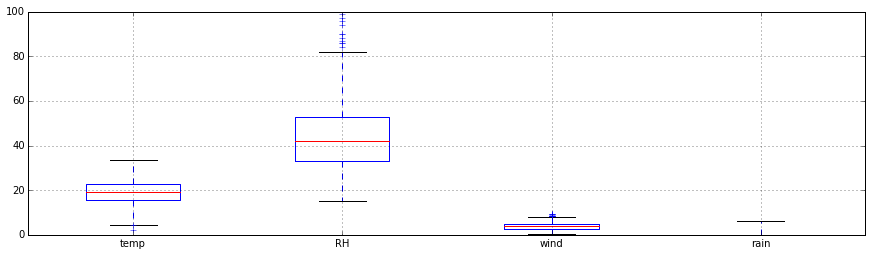

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sdf.boxplot(ax=ax)
plt.show()

**해석:**

[Mission 4] 4대요인 및 area를 포함하여 dataframe을 얻어오고 area를 두 가지 부류로 나누어 각 4가지 속성을 비교 분석하기
------------

In [16]:
sdf = df[['temp', 'RH', 'wind', 'rain', 'area']]
sdf

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.00
1,18.0,33,0.9,0.0,0.00
2,14.6,33,1.3,0.0,0.00
3,8.3,97,4.0,0.2,0.00
4,11.4,99,1.8,0.0,0.00
5,22.2,29,5.4,0.0,0.00
6,24.1,27,3.1,0.0,0.00
7,8.0,86,2.2,0.0,0.00
8,13.1,63,5.4,0.0,0.00
9,22.8,40,4.0,0.0,0.00


**편차를 줄이기 위하여 numpy.log1p (자연로그) 사용**

In [17]:
sdf.loc[:,'area'] = np.log1p(sdf['area'])
sdf

C:\Users\Saetbyeol\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.000000
1,18.0,33,0.9,0.0,0.000000
2,14.6,33,1.3,0.0,0.000000
3,8.3,97,4.0,0.2,0.000000
4,11.4,99,1.8,0.0,0.000000
5,22.2,29,5.4,0.0,0.000000
6,24.1,27,3.1,0.0,0.000000
7,8.0,86,2.2,0.0,0.000000
8,13.1,63,5.4,0.0,0.000000
9,22.8,40,4.0,0.0,0.000000


In [18]:
sdf.describe()

,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663,1.111026
std,5.806625,16.317469,1.791653,0.295959,1.398436
min,2.200000,15.000000,0.400000,0.000000,0.000000
25%,15.500000,33.000000,2.700000,0.000000,0.000000
50%,19.300000,42.000000,4.000000,0.000000,0.418710
75%,22.800000,53.000000,4.900000,0.000000,2.024193
max,33.300000,100.000000,9.400000,6.400000,6.995620


**log(1 + area) 값이 50% percentile 이상인 것과 50% percentile 이하인 것으로 분류**

In [19]:
sdf_1 = sdf[sdf.area >= 0.418710]
sdf_2 = sdf[sdf.area < 0.418710]

In [20]:
sdf_1

,temp,RH,wind,rain,area
141,23.3,31,4.5,0.0,0.438255
142,21.2,51,8.9,0.0,0.476234
143,16.6,53,5.4,0.0,0.536493
144,23.8,32,5.4,0.0,0.570980
145,27.4,22,4.0,0.0,0.641854
146,13.2,40,5.4,0.0,0.667829
147,24.2,28,3.6,0.0,0.672944
148,17.4,43,6.7,0.0,0.727549
149,23.7,25,4.5,0.0,0.751416
150,23.2,39,5.4,0.0,0.783902


In [21]:
sdf_2

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.000000
1,18.0,33,0.9,0.0,0.000000
2,14.6,33,1.3,0.0,0.000000
3,8.3,97,4.0,0.2,0.000000
4,11.4,99,1.8,0.0,0.000000
5,22.2,29,5.4,0.0,0.000000
6,24.1,27,3.1,0.0,0.000000
7,8.0,86,2.2,0.0,0.000000
8,13.1,63,5.4,0.0,0.000000
9,22.8,40,4.0,0.0,0.000000


In [22]:
sdf_1.describe()

,temp,RH,wind,rain,area
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,19.256923,43.696154,4.133462,0.030000,2.198902
std,6.269451,15.275462,1.899338,0.405969,1.226033
min,2.200000,15.000000,0.400000,0.000000,0.418710
25%,15.900000,32.750000,2.700000,0.000000,1.228844
50%,20.100000,41.000000,4.000000,0.000000,2.022208
75%,23.400000,53.000000,4.900000,0.000000,2.838020
max,33.300000,96.000000,9.400000,6.400000,6.995620


In [23]:
sdf_2.describe()

,temp,RH,wind,rain,area
count,257.000000,257.00000,257.000000,257.000000,257.000000
mean,18.517121,44.88716,3.900389,0.013230,0.010450
std,5.283718,17.31732,1.671229,0.098326,0.055369
min,4.200000,15.00000,0.900000,0.000000,0.000000
25%,15.400000,33.00000,2.700000,0.000000,0.000000
50%,18.700000,42.00000,3.600000,0.000000,0.000000
75%,21.700000,54.00000,5.400000,0.000000,0.000000
max,32.400000,100.00000,8.500000,1.000000,0.385262


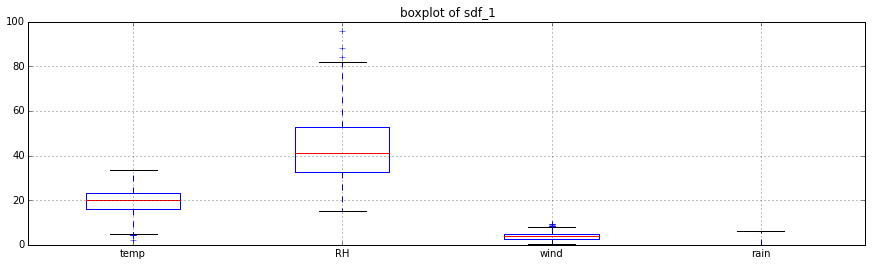

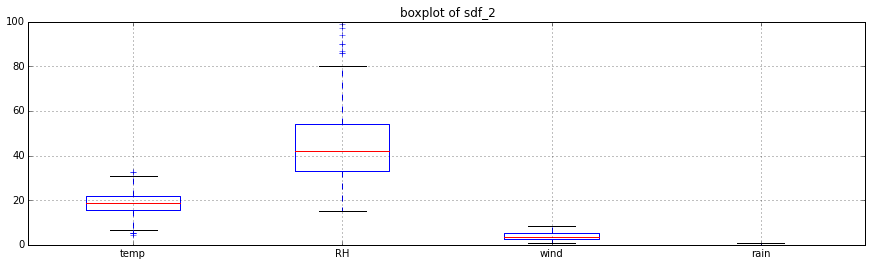

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
ax.set_title('boxplot of sdf_1')
sdf_1.iloc[:,:4].boxplot(ax=ax)
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
ax.set_title('boxplot of sdf_2')
sdf_2.iloc[:,:4].boxplot(ax=ax)
plt.show()

**해석:**

[Mission 5] 단일변수 선형 회귀분석을 통하여 가장 영향이 높은 속성 선발
----

In [25]:
sdf = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]
sdf

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [26]:
predicator_names = ('FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
predicator_analysis = {}
for i in range(0, 8):
    predicator_analysis[i] = Series(np.empty(6), index=['slope', 'intercept', 'r_value', 'r_squared', 'p_value', 'std_err'])
    predicator_analysis[i][0],\
    predicator_analysis[i][1],\
    predicator_analysis[i][2],\
    predicator_analysis[i][4],\
    predicator_analysis[i][5] = stats.linregress(sdf[predicator_names[i]].values, sdf['area'].values)
    predicator_analysis[i][3] = predicator_analysis[i][2] ** 2

format1 = "%3s %10s %10s %10s %10s %10s %10s"
format2 = "%4s %10f %10f %10f %10f %10f %10f"
print format1 % ('names', 'slope', 'intercept', 'r_value', 'r_squared', 'p_value', 'std_err')
for i in range(0, 8):
    lst = [predicator_names[i]]
    for j in range(0, 6):
        lst.append(predicator_analysis[i][j])
    print format2 % tuple(lst)

names      slope  intercept    r_value  r_squared    p_value    std_err
FFMC   0.462672 -29.091436   0.040122   0.001610   0.362592   0.507735
 DMC   0.072549   4.803609   0.072994   0.005328   0.097335   0.043680
  DC   0.012672   5.903719   0.049383   0.002439   0.262363   0.011294
 ISI   0.115287  11.807209   0.008258   0.000068   0.851418   0.615183
temp   1.072628  -7.413752   0.097844   0.009573   0.026101   0.480753
  RH  -0.294604  25.894785  -0.075519   0.005703   0.086271   0.171411
wind   0.437622  11.089102   0.012317   0.000152   0.779939   1.565481
rain  -1.584244  12.881612  -0.007366   0.000054   0.867310   9.477439


In [27]:
df2 = pd.DataFrame(predicator_analysis)
df2.columns = ('FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
df2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
slope,0.462672,0.072549,0.012672,0.115287,1.072628,-0.294604,0.437622,-1.584244
intercept,-29.091436,4.803609,5.903719,11.807209,-7.413752,25.894785,11.089102,12.881612
r_value,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366
r_squared,0.001610,0.005328,0.002439,0.000068,0.009573,0.005703,0.000152,0.000054
p_value,0.362592,0.097335,0.262363,0.851418,0.026101,0.086271,0.779939,0.867310
std_err,0.507735,0.043680,0.011294,0.615183,0.480753,0.171411,1.565481,9.477439


가장 영향이 높은 속성은 p_value의 값이 가장 낮은 'temp' 속성입니다. (p-value = 0.026101) 

그 다음으로 영향이 높은 속성은 'RH' 속성입니다. (p-value = 0.086271)

p_value(유의 확률)는 0.05 미만이면 predictor와 outcome value 사이에 (선형) 관계가 존재한다고 볼 수 있습니다. 

[Mission 6] 가장 영향이 높은 요인 두 개로 다변수 선형 회귀분석 수행
---------

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = zip(sdf['temp'], sdf['RH'])
y = sdf['area'].values

regr = regr.fit(x, y)

print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [ 0.8810733  -0.12925007]
Intercept: 1.92880310331


y = 1.9288 + 0.8810 * 'temp' - 0.1292 * 'RH'

In [29]:
predicted_area = []
for i in range(0, len(sdf)):
    predicted_area.append(regr.predict(x[i]))

sdf.loc[:, 'predicted_area'] = predicted_area
sdf

C:\Users\Saetbyeol\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\core\indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,predicted_area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,2.561851
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,13.522870
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,10.527221
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,-3.295545
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,-0.822718
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,17.740379
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00,19.672918
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00,-2.138116
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00,5.328109
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,16.847272


[Mission 7] 가장 영향이 높은 요인 두 개로 다변수 로지스틱 회귀분석 수행
----------

In [30]:
sdf = df[['temp', 'RH', 'area']]
sdf.loc[:, 'area'] = np.log1p(sdf['area'])
sdf.describe()

,temp,RH,area
count,517.000000,517.000000,517.000000
mean,18.889168,44.288201,1.111026
std,5.806625,16.317469,1.398436
min,2.200000,15.000000,0.000000
25%,15.500000,33.000000,0.000000
50%,19.300000,42.000000,0.418710
75%,22.800000,53.000000,2.024193
max,33.300000,100.000000,6.995620


In [31]:
fire = []
for i in range(0, len(sdf)):
    if sdf.iloc[i]['area'] >= 0.418710:
        fire.append(1)
    else:
        fire.append(0)

sdf.loc[:, 'fire'] = fire
sdf

,temp,RH,area,fire
0,8.2,51,0.000000,0
1,18.0,33,0.000000,0
2,14.6,33,0.000000,0
3,8.3,97,0.000000,0
4,11.4,99,0.000000,0
5,22.2,29,0.000000,0
6,24.1,27,0.000000,0
7,8.0,86,0.000000,0
8,13.1,63,0.000000,0
9,22.8,40,0.000000,0


In [32]:
attributes = zip(sdf['temp'], sdf['RH'])
target = sdf['fire'].values
regr2 = linear_model.LogisticRegression()
regr2.fit(attributes, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [33]:
print 'Coefficients:', regr2.coef_
print 'Intercept:', regr2.intercept_

Coefficients: [[ 0.01885868 -0.00132539]]
Intercept: [-0.2837215]


In [34]:
predicted_fire = []
for i in range(0, len(sdf)):
    predicted_fire.append(regr2.predict(attributes[i]))

sdf.loc[:, 'predicted_fire'] = predicted_fire
sdf

,temp,RH,area,fire,predicted_fire
0,8.2,51,0.000000,0,0
1,18.0,33,0.000000,0,1
2,14.6,33,0.000000,0,0
3,8.3,97,0.000000,0,0
4,11.4,99,0.000000,0,0
5,22.2,29,0.000000,0,1
6,24.1,27,0.000000,0,1
7,8.0,86,0.000000,0,0
8,13.1,63,0.000000,0,0
9,22.8,40,0.000000,0,1


In [35]:
error = 0
for i in range(0, len(sdf)):
    if predicted_fire[i] != target[i]:
        error += 1
        
print 1- float(error) / len(sdf)

0.541586073501
